<a href="https://colab.research.google.com/github/JonathanJuradoS/TecnicasBusqueda/blob/main/Evacuacion_Laberinto_BFS_DFS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# 🚪 Espacio Práctico: Ruta de Evacuación en un Edificio

Este notebook permite simular una situación de evacuación en un edificio, donde un agente debe encontrar la mejor ruta desde su posición actual hasta la salida de emergencia utilizando algoritmos de búsqueda **BFS** y **DFS**.



## 🏢 Representación del Laberinto

El edificio es una matriz 5x6 donde:
- `' '` representa una celda libre.
- `'#'` representa una pared.
- `'S'` representa la salida de emergencia.


In [ ]:

laberinto = [
    [' ', ' ', ' ', '#', ' ', 'S'],
    ['#', '#', ' ', '#', ' ', '#'],
    [' ', ' ', ' ', ' ', ' ', ' '],
    [' ', '#', '#', '#', '#', ' '],
    [' ', ' ', ' ', ' ', ' ', ' '],
]

movs = [(-1,0), (1,0), (0,-1), (0,1)]

def vecinos(i, j):
    resultado = []
    for dx, dy in movs:
        x, y = i+dx, j+dy
        if 0 <= x < len(laberinto) and 0 <= y < len(laberinto[0]):
            if laberinto[x][y] != '#':
                resultado.append((x, y))
    return resultado

def encontrar_salida():
    for i in range(len(laberinto)):
        for j in range(len(laberinto[0])):
            if laberinto[i][j] == 'S':
                return (i, j)


In [ ]:

from collections import deque

def bfs(inicio, objetivo):
    visitados = set()
    cola = deque([(inicio, [])])
    while cola:
        actual, camino = cola.popleft()
        if actual in visitados:
            continue
        visitados.add(actual)
        if actual == objetivo:
            return camino + [actual]
        for v in vecinos(*actual):
            cola.append((v, camino + [actual]))
    return None

def dfs(inicio, objetivo, profundidad_max=50):
    visitados = set()
    pila = [(inicio, [])]
    while pila:
        actual, camino = pila.pop()
        if actual in visitados:
            continue
        visitados.add(actual)
        if actual == objetivo:
            return camino + [actual]
        if len(camino) >= profundidad_max:
            continue
        for v in vecinos(*actual):
            pila.append((v, camino + [actual]))
    return None


In [ ]:

inicio = (4, 0)
objetivo = encontrar_salida()

camino_bfs = bfs(inicio, objetivo)
camino_dfs = dfs(inicio, objetivo)

print("📌 Ruta BFS:")
print(camino_bfs)

print("\n📌 Ruta DFS:")
print(camino_dfs)


📌 Ruta BFS:
[(4, 0), (3, 0), (2, 0), (2, 1), (2, 2), (2, 3), (2, 4), (1, 4), (0, 4), (0, 5)]

📌 Ruta DFS:
[(4, 0), (4, 1), (4, 2), (4, 3), (4, 4), (4, 5), (3, 5), (2, 5), (2, 4), (1, 4), (0, 4), (0, 5)]


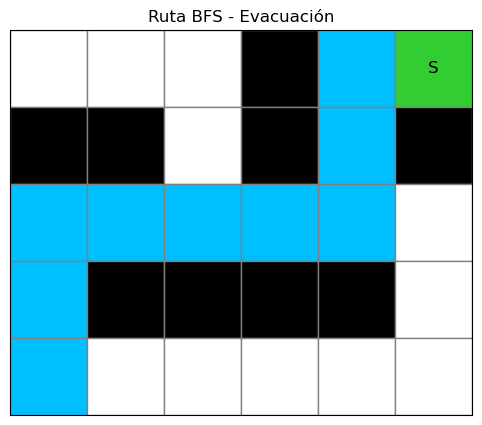

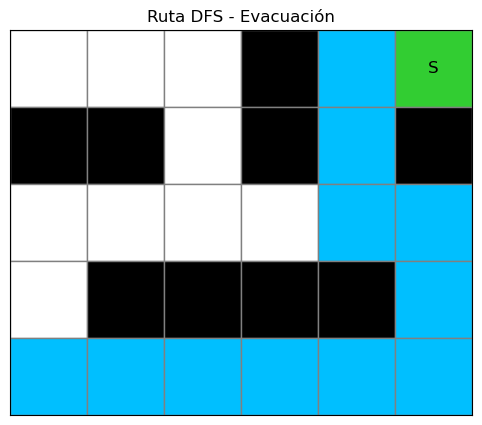

In [ ]:

# 🧭 Visualización del recorrido

import matplotlib.pyplot as plt
import matplotlib.patches as patches

def dibujar_laberinto(camino, titulo):
    fig, ax = plt.subplots(figsize=(8,5))
    for i in range(len(laberinto)):
        for j in range(len(laberinto[0])):
            val = laberinto[i][j]
            color = "white"
            if val == '#':
                color = "black"
            elif val == 'S':
                color = "lightgreen"
            if (i,j) in camino:
                idx = camino.index((i,j))
                color = "deepskyblue" if idx < len(camino)-1 else "limegreen"
            rect = patches.Rectangle((j, len(laberinto)-1-i), 1, 1, facecolor=color, edgecolor='gray')
            ax.add_patch(rect)
            if val not in [' ', '#']:
                ax.text(j+0.5, len(laberinto)-1-i+0.5, val, ha='center', va='center', fontsize=12)
    ax.set_xlim(0, len(laberinto[0]))
    ax.set_ylim(0, len(laberinto))
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(titulo)
    plt.gca().set_aspect('equal')
    plt.show()

dibujar_laberinto(camino_bfs, "Ruta BFS - Evacuación")
dibujar_laberinto(camino_dfs, "Ruta DFS - Evacuación")



## ✅ Conclusiones

- El problema de encontrar una ruta de evacuación se puede modelar como un **espacio de estados**.
- BFS garantiza el camino más corto, pero puede ser más lento en laberintos grandes.
- DFS puede ser más rápido en profundidad, pero no garantiza el camino óptimo.
- Visualizar las rutas ayuda a entender cómo cada algoritmo recorre el espacio de búsqueda.
